In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wiki_pages = pd.read_csv("/home/clay/research/kaggle/kaggle_llm/data/physics_pages_list/physics_pages.csv")
wiki_pages.head()

,page,section_title,text
0,Electric field,Description,The electric field is defined at each point in...
1,Electric field,Mathematical formulation,Electric fields are caused by electric charges...
2,Electric field,Electrostatic fields,Electrostatic fields are electric fields that ...
3,Electric field,Electrodynamic fields,Electrodynamic fields are electric fields whic...
4,Electric field,Energy in the electric field,The total energy per unit volume stored by the...


In [3]:
i = 3

_text = wiki_pages["text"][i]
_text

"Electrodynamic fields are electric fields which do change with time, for instance when charges are in motion. In this case, a magnetic field is produced in accordance with Ampère's circuital law (with Maxwell's addition), which, along with Maxwell's other equations, defines the magnetic field, \n  \n    \n      B\n    \n    \\mathbf {B}\n  , in terms of its curl:\n\nwhere \n  \n    \n      J\n    \n    \\mathbf {J}\n   is the current density, \n  \n    \n      μ\n      \n        0\n      \n    \n    \\mu _{0}\n   is the vacuum permeability, and \n  \n    \n      ε\n      \n        0\n      \n    \n    \\varepsilon _{0}\n   is the vacuum permittivity.\nThat is, both electric currents (i.e. charges in uniform motion) and the (partial) time derivative of the electric field directly contributes to the magnetic field. In addition, the Maxwell–Faraday equation states \n\nThese represent two of Maxwell's four equations and they intricately link the electric and magnetic fields together, resu

In [4]:
len(wiki_pages["page"].unique())

896

In [6]:
import re


def format_bad_latex(text):
    text = re.sub("\\n\s+", "", text)
    text = re.sub("\s+", " ", text)
    return text


def count_words(text):
    return sum([1 for i in text.split() if len(i) > 0])


wiki_pages["text"] = wiki_pages["text"].apply(format_bad_latex)
wiki_pages["word_count"] = wiki_pages["text"].apply(count_words)
print(wiki_pages["word_count"].sum())

895744


In [12]:
wiki_pages.to_csv("/home/clay/research/kaggle/kaggle_llm/data/physics_pages_list/physics_pages_formatted.csv")

<AxesSubplot: >

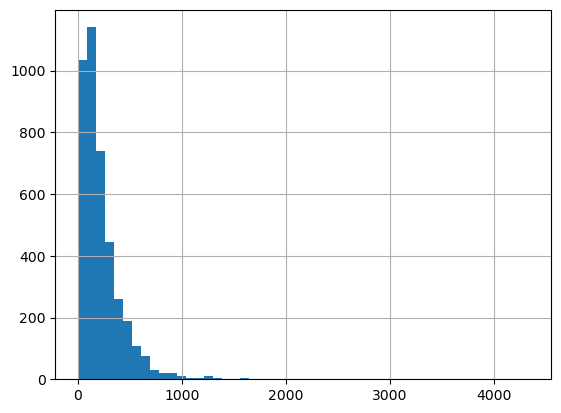

In [7]:
wiki_pages["word_count"].hist(bins=50)

In [8]:
wc_per_page = wiki_pages.groupby("page")[["word_count"]].sum().sort_values("word_count", ascending=False)
wc_per_page.head()

,word_count
page,
Galactocentric distance,16307
Hohenberg-Kohn theorems,6063
Star,5346
Total internal reflection,5289
Vasiliev equations,5268


In [11]:
cutoff_length = 8000
wc_per_page[wc_per_page["word_count"] > cutoff_length].index

Index(['Galactocentric distance'], dtype='object', name='page')

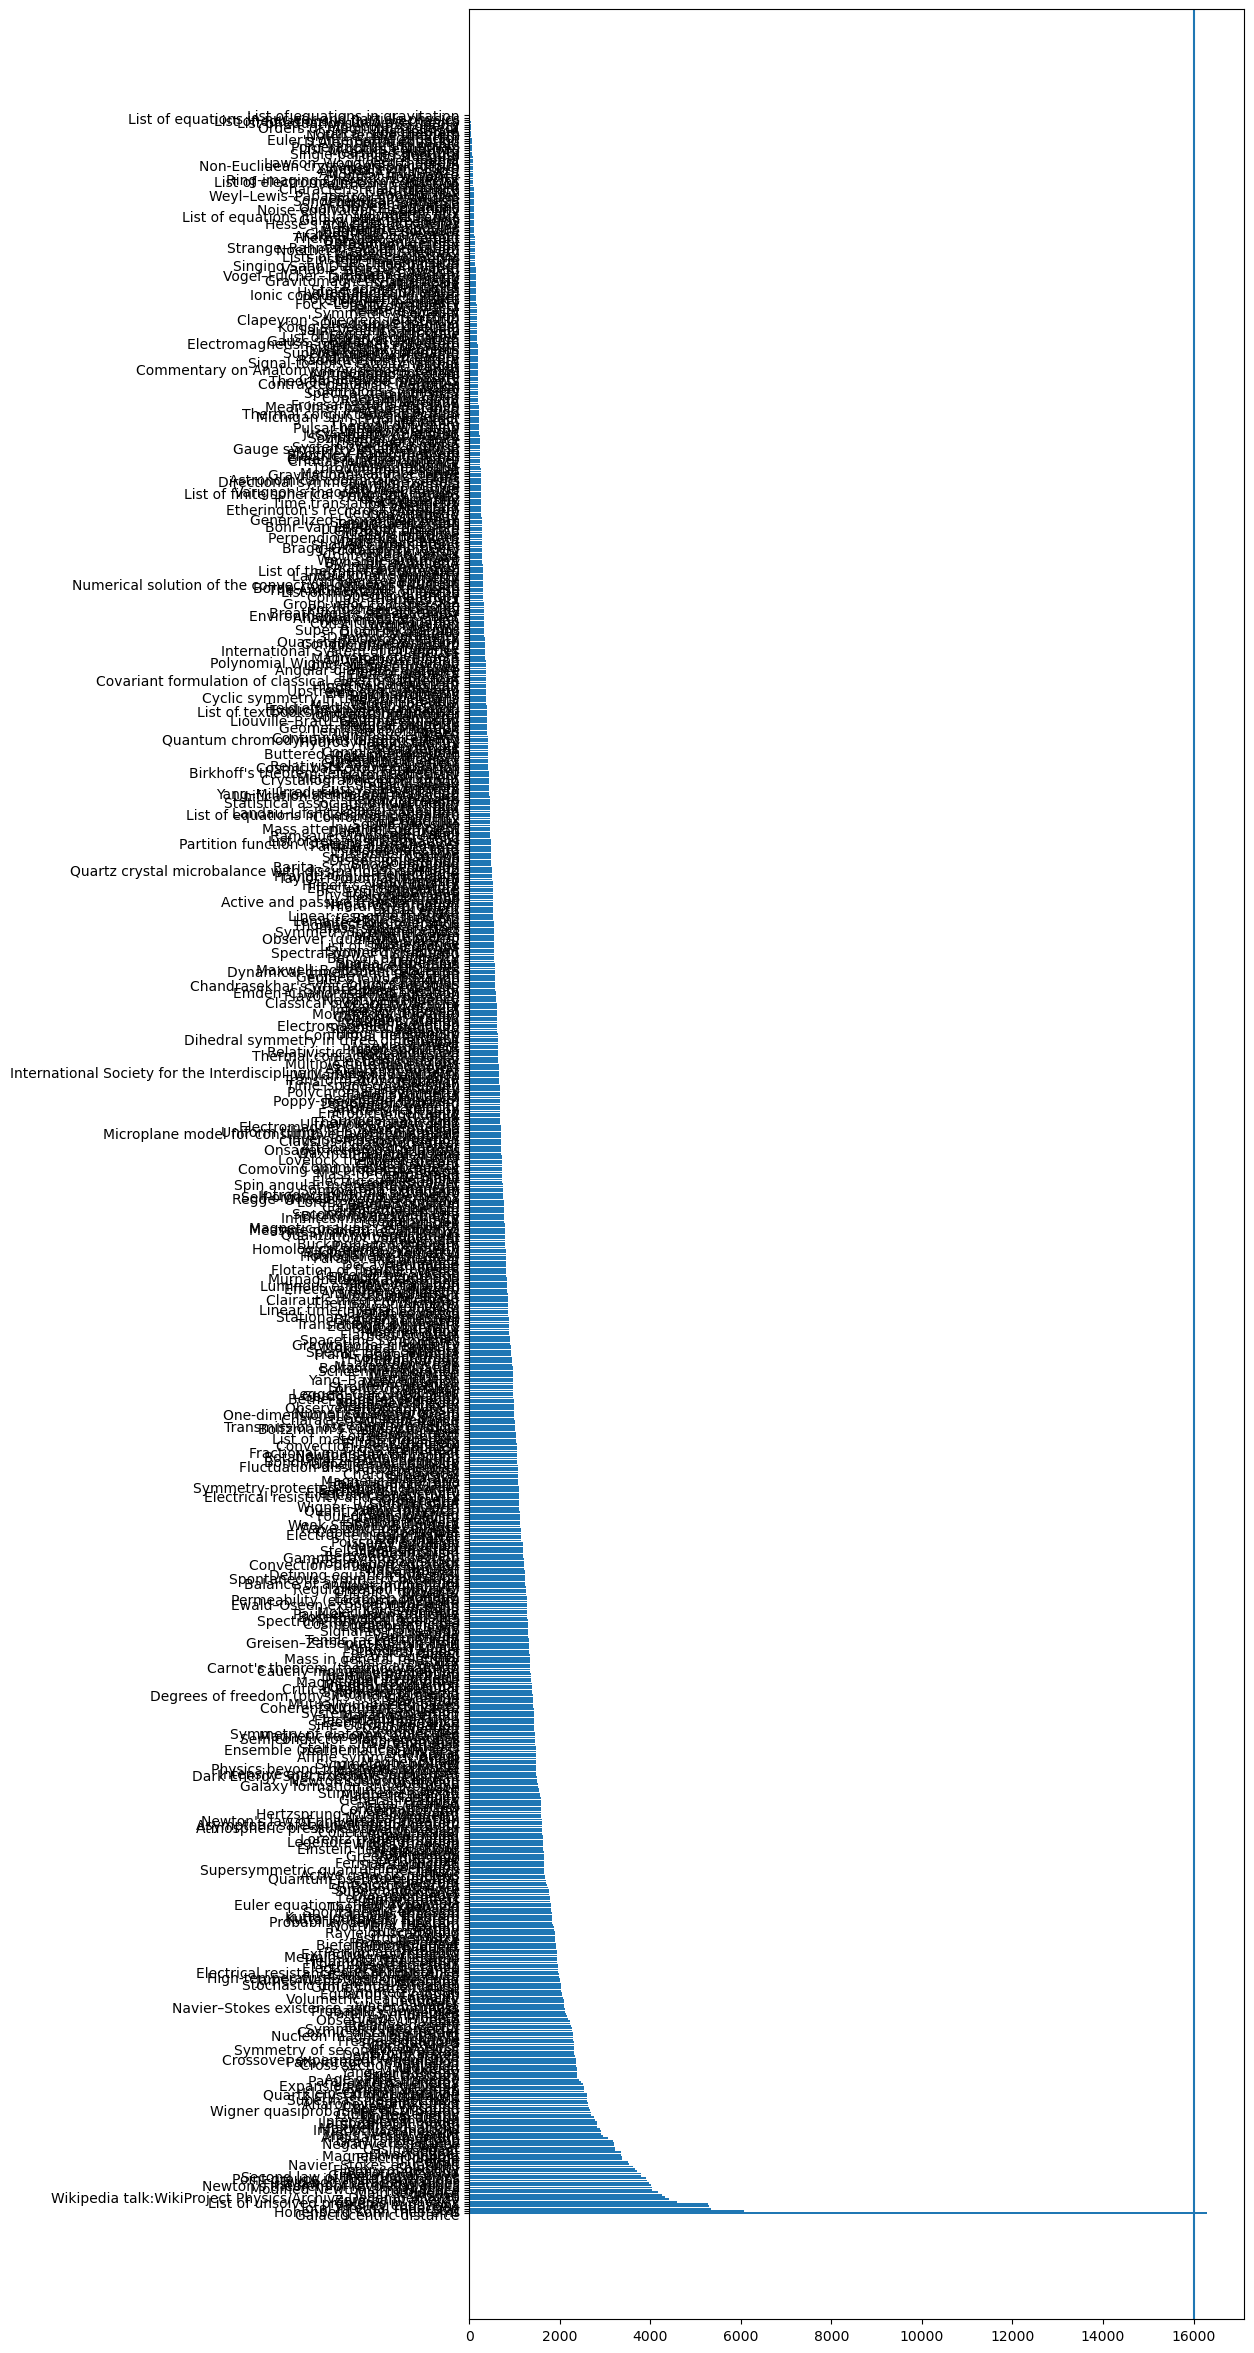

In [9]:
plt.figure(figsize=(10, 30))
plt.barh(
    wc_per_page.index,
    wc_per_page["word_count"],
)
plt.axvline(16000)

In [ ]:
# when there's any latex symbols (found via \, remove every thing with "\n" or " " )
# it's going to be [\n\n\n\n something \n\n\n\n latex \n\n\n]

In [ ]:
(\\n| )*[^\\]((\\n| )*([^\\]*)(\\n| )*)(\\\\[^(\\n)]*)\\n *

In [ ]:
((\\n| )+[A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ0-9])?(\\n| )+[A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ0-9](\\n| )+